In [2]:
import os
import json
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
# Directorios de los archivos JSON
train_estable_dir = r'C:\Users\carolina\Documents\VS Code\Reconocimiento_emociones_modelo\Puntos_faciales\JSON_de_imagenes\Entrenamiento\Estable'
train_inestable_dir = r'C:\Users\carolina\Documents\VS Code\Reconocimiento_emociones_modelo\Puntos_faciales\JSON_de_imagenes\Entrenamiento\Inestable'
val_estable_dir = r'C:\Users\carolina\Documents\VS Code\Reconocimiento_emociones_modelo\Puntos_faciales\JSON_de_imagenes\Validacion\Estable'
val_inestable_dir = r'C:\Users\carolina\Documents\VS Code\Reconocimiento_emociones_modelo\Puntos_faciales\JSON_de_imagenes\Validacion\Inestable'

In [4]:
# Leer los archivos JSON y preparar los datos
def load_data(json_dir, label):
    data = []
    labels = []
    for file_name in os.listdir(json_dir):
        file_path = os.path.join(json_dir, file_name)
        with open(file_path, 'r') as f:
            points = json.load(f)
            # Aplanar los puntos faciales en un vector unidimensional
            for face in points:
                flattened_points = [coord for landmark in face for coord in (landmark['x'], landmark['y'], landmark['z'])]
                data.append(flattened_points)
                labels.append(label)
    return data, labels

In [5]:
# Cargar los datos de los archivos JSON
train_estable_data, train_estable_labels = load_data(train_estable_dir, 0)
train_inestable_data, train_inestable_labels = load_data(train_inestable_dir, 1)
val_estable_data, val_estable_labels = load_data(val_estable_dir, 0)
val_inestable_data, val_inestable_labels = load_data(val_inestable_dir, 1)

In [6]:
# Combinar los datos y etiquetas
train_data = np.array(train_estable_data + train_inestable_data)
train_labels = np.array(train_estable_labels + train_inestable_labels)
val_data = np.array(val_estable_data + val_inestable_data)
val_labels = np.array(val_estable_labels + val_inestable_labels)

In [9]:
# Ver los valores asignados a cada clase
print("Etiquetas de entrenamiento:")
print("Estable:", train_estable_labels[0])
print("Inestable:", train_inestable_labels[0])

print("Etiquetas de validación:")
print("Estable:", val_estable_labels[0])
print("Inestable:", val_inestable_labels[0])

Etiquetas de entrenamiento:
Estable: 0
Inestable: 1
Etiquetas de validación:
Estable: 0
Inestable: 1


In [7]:
# Definir el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(len(train_data[0]),)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\carolina\Documents\VS Code\Reconocimiento_emociones_modelo\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
# Entrenar el modelo
history = model.fit(train_data, train_labels,
                    epochs=58,
                    batch_size=32,
                    validation_data=(val_data, val_labels))

Epoch 1/58
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8706 - loss: 0.3050 - val_accuracy: 0.8243 - val_loss: 0.3991
Epoch 2/58
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8733 - loss: 0.2978 - val_accuracy: 0.8370 - val_loss: 0.4107
Epoch 3/58
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8728 - loss: 0.2976 - val_accuracy: 0.8351 - val_loss: 0.3875
Epoch 4/58
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8736 - loss: 0.3000 - val_accuracy: 0.7210 - val_loss: 0.7091
Epoch 5/58
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8586 - loss: 0.3305 - val_accuracy: 0.7935 - val_loss: 0.4342
Epoch 6/58
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8735 - loss: 0.2997 - val_accuracy: 0.7482 - val_loss: 0.6267
Epoch 7/58
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8767 - loss: 0.2971 - val_accuracy: 0.8134 - val_loss: 0.4257
Epoch 8/58
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8743 - loss: 0.2910 - val_accuracy: 0.

Mejor época de entrenamiento en base a la precisión:  59
Precisión:  0.8733853101730347
Mejor época de validación en base a la precisión:  50
Precisión:  0.8387681245803833
Mejor época de entrenamiento en base a la pérdida:  59
Pérdida:  0.29993030428886414
Mejor época de validación en base a la pérdida:  58
Pérdida:  0.38274186849594116


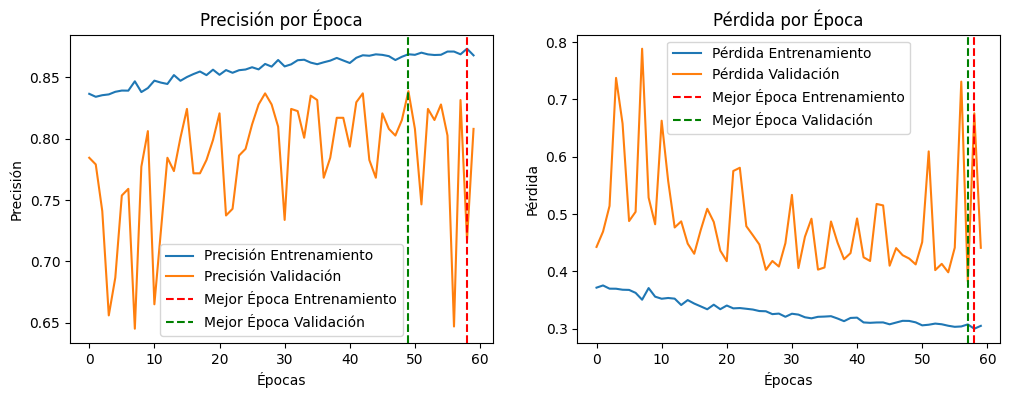

In [16]:
import matplotlib.pyplot as plt

# Calcular la mejor época de entrenamiento y validación en base a la precisión
mejor_epoca_precision_entrenamiento = history.history['accuracy'].index(max(history.history['accuracy'])) + 1
mejor_epoca_precision_validacion = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Calcular la mejor época de entrenamiento y validación en base a la pérdida
mejor_epoca_perdida_entrenamiento = history.history['loss'].index(min(history.history['loss'])) + 1
mejor_epoca_perdida_validacion = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

# Mostrar los resultados
print('Mejor época de entrenamiento en base a la precisión: ', mejor_epoca_precision_entrenamiento)
print('Precisión: ', history.history['accuracy'][mejor_epoca_precision_entrenamiento-1])
print('Mejor época de validación en base a la precisión: ', mejor_epoca_precision_validacion)
print('Precisión: ', history.history['val_accuracy'][mejor_epoca_precision_validacion-1])
print('Mejor época de entrenamiento en base a la pérdida: ', mejor_epoca_perdida_entrenamiento)
print('Pérdida: ', history.history['loss'][mejor_epoca_perdida_entrenamiento-1])
print('Mejor época de validación en base a la pérdida: ', mejor_epoca_perdida_validacion)
print('Pérdida: ', history.history['val_loss'][mejor_epoca_perdida_validacion-1])

# Graficar precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.axvline(x=mejor_epoca_precision_entrenamiento-1, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_precision_validacion-1, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.axvline(x=mejor_epoca_perdida_entrenamiento-1, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_perdida_validacion-1, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [18]:
# Mostrar la precisión y pérdida de la época especificada
epoca = 58
print('Precisión en la época', epoca, 'de entrenamiento:', history.history['accuracy'][epoca-1])
print('Pérdida en la época', epoca, 'de entrenamiento:', history.history['loss'][epoca-1])
print('Precisión en la época', epoca, 'de validación:', history.history['val_accuracy'][epoca-1])
print('Pérdida en la época', epoca, 'de validación:', history.history['val_loss'][epoca-1])

Precisión en la época 58 de entrenamiento: 0.8688388466835022
Pérdida en la época 58 de entrenamiento: 0.3074578046798706
Precisión en la época 58 de validación: 0.83152174949646
Pérdida en la época 58 de validación: 0.38274186849594116


In [23]:
# Evaluar el modelo en el conjunto de entrenamiento
resultados_entrenamiento = model.evaluate(train_data, train_labels)
precision_entrenamiento = resultados_entrenamiento[1]
perdida_entrenamiento = resultados_entrenamiento[0]

# Evaluar el modelo en el conjunto de validación
resultados_validacion = model.evaluate(val_data, val_labels)
precision_validacion = resultados_validacion[1]
perdida_validacion = resultados_validacion[0]

# Mostrar los resultados
print('Precisión en el conjunto de entrenamiento:', precision_entrenamiento)
print('Pérdida en el conjunto de entrenamiento:', perdida_entrenamiento)
print('Precisión en el conjunto de validación:', precision_validacion)
print('Pérdida en el conjunto de validación:', perdida_validacion)

867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.9302 - loss: 0.2017
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.9116 - loss: 0.2452
Precisión en el conjunto de entrenamiento: 0.8960813879966736
Pérdida en el conjunto de entrenamiento: 0.24997064471244812
Precisión en el conjunto de validación: 0.8442028760910034
Pérdida en el conjunto de validación: 0.36868661642074585


In [25]:
# Guardar el modelo
model.save('Modelos_pf/model_estable_inestable.h5')

In [26]:
# Convertir el modelo a formato tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\carolina\AppData\Local\Temp\tmp0r0xgpn0\assets


INFO:tensorflow:Assets written to: C:\Users\carolina\AppData\Local\Temp\tmp0r0xgpn0\assets


Saved artifact at 'C:\Users\carolina\AppData\Local\Temp\tmp0r0xgpn0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1434), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1160528741968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1160528744272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1160528745808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1160528746768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1160528746000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1160528744848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1160528745424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1160528747152: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [27]:
# Guardar el modelo tflite
with open('Modelos_pf/model_estable_inestable.tflite', 'wb') as f:
    f.write(tflite_model)